In [13]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# General imports
import os
import pickle
from scipy import stats
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.
w = 3.5
h = 3.25              # Plots have dimension (w,h)

In [15]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Simple

## $A/B$ Parametrization

In [18]:
# Experiment parameters
num = 0    # bkgd: normal(-0.1, 1)     sgnl: normal(0.1, 1)
reps = 20

# File parameters
dirstr = 'models/univariate/simple/ab_mse/set_{}/'.format(num)
filestr = dirstr + 'model_{}_{}.h5'

if not os.path.isdir(dirstr):
    os.mkdir(dirstr)

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)
ps = np.round(np.linspace(-2, 2, 101), 2)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

In [ ]:
# Get model likelihood ratios.
avgs = []
for p in ps:
    print(p, end = '\t')
    lrs = [None] * reps
    params = {'loss':get_mse(p)}
    for i in range(reps):
        model = create_simple_model(**params)
        model.load_weights(filestr.format(p, i))
        lrs[i] = pow_odds_lr(model, p, m, s)
    
    maes = [mae(lr) for lr in lrs]
    avgs += [np.mean(maes)]

avgs = np.array(avgs)

-2.0	-1.96	-1.92	-1.88	-1.84	

# Normal

## Naïve Implementation

In [116]:
# Experiment parameters
num = 0
reps = 100
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce}
mse_params = {'loss':mse}
mlc_params = {'loss':mlc, 'output':'relu'}
sqr_params = {'loss':sqr, 'output':'relu'}

filestr = 'models/univariate/loss_comp/set_{}/'.format(num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
mse_filestr = filestr + 'mse/model_{}_{}.h5'
mlc_filestr = filestr + 'mlc/model_{}_{}.h5'
sqr_filestr = filestr + 'sqr/model_{}_{}.h5'

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

### Likelihood Ratios

#### Process

#### Plot

In [ ]:
xs = np.load(filestr + 'xs.npy')
bce_preds = np.load(filestr + 'bce_preds.npy')
mse_preds = np.load(filestr + 'mse_preds.npy')
mlc_preds = np.load(filestr + 'mlc_preds.npy')
sqr_preds = np.load(filestr + 'sqr_preds.npy')

In [ ]:
ratio_plot([bce_preds, mse_preds, mlc_preds, sqr_preds],
           ['BCE', 'MSE', 'MLC', 'SQR'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it Na\"ive Implementation',
           filename = 'plots/paper/naive_fit.png')

### MAEs

#### Process

#### Plot

In [117]:
bce_avg = np.load(filestr + 'bce_avg.npy')
mse_avg = np.load(filestr + 'mse_avg.npy')
mlc_avg = np.load(filestr + 'mlc_avg.npy')
sqr_avg = np.load(filestr + 'sqr_avg.npy')

(None,)

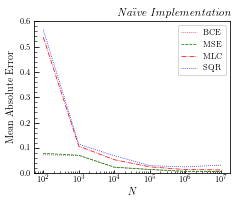

In [118]:
mae_plot([bce_avg, mse_avg, mlc_avg, sqr_avg],
         ['BCE', 'MSE', 'MLC', 'SQR'],
         Ns,
         figsize = (w, h),
         title = r'\it Na\"ive Implementation'),
         filename = 'plots/paper/naive_sizes.png')

## $C$ Parametrization

### BCE $C$ Parametrization

In [4]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce}
params_2 = {'loss':tanh_bce, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'output': 'linear'}

filestr = 'models/univariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_bce.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MSE $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse}
params_2 = {'loss':tanh_mse, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'output': 'linear'}

filestr = 'models/univariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mse.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MLC $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'output': 'linear'}

filestr = 'models/univariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mlc.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### SQR $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'output': 'linear'}

filestr = 'models/univariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_sqr.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

## $A$/$B$ Parametrization

### SQR $A/B$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/univariate/ab_sqr/set_{}/'.format(num)
lin_filestr = filestr + 'relu/model_{}_{}.h5'
exp_filestr = filestr + 'exponential/model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

rs = np.sort(np.append(np.round(np.linspace(-2, 2, 81), 2),
                       np.round(np.linspace(-0.05, 0.05, 26), 3)[1:-1]))

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### MAEs

In [ ]:
lin_avgs = np.load(filestr + 'lin_avgs.npy')
exp_avgs = np.load(filestr + 'exp_avgs.npy')

rs[lin_avgs == min(lin_avgs)], rs[exp_avgs == min(exp_avgs)]

In [ ]:
plt.figure(figsize = (w, h))

plt.plot(rs, lin_avgs, label=r'$\text{ReLU}(z)$', c='blue', lw = 0.75)
plt.plot(rs, exp_avgs, label=r'$\exp{z}$', c='red', lw = 0.75)
plt.legend()

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$r$')
plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_sqr.png', 
            dpi=300, 
            bbox_inches='tight')

### MSE $A/B$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/univariate/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

ps = np.round(np.linspace(-2, 2, 101), 2)

# True distribution information
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')

#### Process

#### MAEs

In [ ]:
avgs = np.load(filestr + 'avgs.npy')
ps[avgs == min(avgs)]

In [ ]:
plt.figure(figsize = (w, h))

plt.plot(ps, avgs, c='blue', lw = 0.75)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')
plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_mse.png', 
            dpi=300, 
            bbox_inches='tight')

## Optimized Implementation

In [5]:
num = 3
reps = 100
Ns = 10**np.arange(2, 8)

mu = 0.1
bkgd = stats.norm(-mu, 1)
sgnl = stats.norm(mu, 1)

mae = make_mae(bkgd, sgnl, 'data/normal/0.1/')
lr = make_lr(bkgd, sgnl)

# Model parameters
p = 1.24
r = 0.018
bce_params = {'loss':bce}
mse_params = {'loss':get_mse(p)}
mlc_params = {'loss':exp_mlc, 'output':'linear'}
sqr_params = {'loss':get_exp_sqr(r), 'output':'linear'}

filestr = 'models/univariate/loss_comp/set_{}/'.format(num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
mse_filestr = filestr + 'mse/model_{}_{}.h5'
mlc_filestr = filestr + 'mlc/model_{}_{}.h5'
sqr_filestr = filestr + 'sqr/model_{}_{}.h5'

### Likelihood Ratios

#### Process

In [128]:
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# Load in models.
bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps
for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(N, i))
    bce_lrs[i] = odds_lr(bce_model, m, s)
    
    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(N, i))
    mse_lrs[i] = pow_odds_lr(mse_model, p, m, s)
    
    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(N, i))
    mlc_lrs[i] = exp_lr(mlc_model, m, s)
    
    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(N, i))
    sqr_lrs[i] = pow_exp_lr(sqr_model, r, m, s)

xs = np.linspace(-6, 6, 1201)

bce_preds = get_preds(bce_lrs, xs)
mse_preds = get_preds(mse_lrs, xs)
mlc_preds = get_preds(mlc_lrs, xs)
sqr_preds = get_preds(sqr_lrs, xs)

In [129]:
np.save(filestr + 'xs', xs)
np.save(filestr + 'bce_preds', bce_preds)
np.save(filestr + 'mse_preds', mse_preds)
np.save(filestr + 'mlc_preds', mlc_preds)
np.save(filestr + 'sqr_preds', sqr_preds)

#### Plot

In [130]:
xs = np.load(filestr + 'xs.npy')
bce_preds = np.load(filestr + 'bce_preds.npy')
mse_preds = np.load(filestr + 'mse_preds.npy')
mlc_preds = np.load(filestr + 'mlc_preds.npy')
sqr_preds = np.load(filestr + 'sqr_preds.npy')

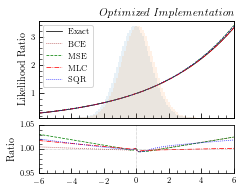

In [131]:
ratio_plot([bce_preds, mse_preds, mlc_preds, sqr_preds],
           ['BCE', 'MSE', 'MLC', 'SQR'],
           lr,
           bkgd, sgnl,
           xs,
           figsize = (w, h),
           title = r'\it Optimized Implementation',
           filename = 'plots/paper/best_fit_3.png')

### MAEs

#### Process

In [6]:
X = np.load('data/normal/0.1/X_trn.npy')
y = np.load('data/normal/0.1/y_trn.npy')

# Calculate mean absolute errors
bce_avg = []
mse_avg = []
mlc_avg = []
sqr_avg = []

for N in Ns:
    print(N)
    data, m, s = split_data(X, y)
    
    bce_lrs = [None] * reps
    mse_lrs = [None] * reps
    mlc_lrs = [None] * reps
    sqr_lrs = [None] * reps
    for i in range(reps):
        bce_model = create_model(**bce_params)
        bce_model.load_weights(bce_filestr.format(N, i))
        bce_lrs[i] = odds_lr(bce_model, m, s)

        mse_model = create_model(**mse_params)
        mse_model.load_weights(mse_filestr.format(N, i))
        mse_lrs[i] = pow_odds_lr(mse_model, p, m, s)

        mlc_model = create_model(**mlc_params)
        mlc_model.load_weights(mlc_filestr.format(N, i))
        mlc_lrs[i] = exp_lr(mlc_model, m, s)

        sqr_model = create_model(**sqr_params)
        sqr_model.load_weights(sqr_filestr.format(N, i))
        sqr_lrs[i] = pow_exp_lr(sqr_model, r, m, s)
    
    bce_maes = [mae(lr) for lr in bce_lrs]
    mse_maes = [mae(lr) for lr in mse_lrs]
    mlc_maes = [mae(lr) for lr in mlc_lrs]
    sqr_maes = [mae(lr) for lr in sqr_lrs]
    
    bce_avg += [np.mean(bce_maes)]
    mse_avg += [np.mean(mse_maes)]
    mlc_avg += [np.mean(mlc_maes)]
    sqr_avg += [np.mean(sqr_maes)]

bce_avg = np.array(bce_avg)
mse_avg = np.array(mse_avg)
mlc_avg = np.array(mlc_avg)
sqr_avg = np.array(sqr_avg)

100


2022-08-10 13:51:23.030088: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-08-10 13:51:23.040217: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-08-10 13:51:23.042045: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e4526ed9c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-10 13:51:23.042105: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-08-10 13:51:23.166862: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e4527d8560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-08-10 13:51:23.166918: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-08-10 13:51:23.168079: I 

1000
10000
100000
1000000
10000000


In [7]:
np.save(filestr + 'bce_avg', bce_avg)
np.save(filestr + 'mse_avg', mse_avg)
np.save(filestr + 'mlc_avg', mlc_avg)
np.save(filestr + 'sqr_avg', sqr_avg)

#### Plot

In [8]:
bce_avg = np.load(filestr + 'bce_avg.npy')
mse_avg = np.load(filestr + 'mse_avg.npy')
mlc_avg = np.load(filestr + 'mlc_avg.npy')
sqr_avg = np.load(filestr + 'sqr_avg.npy')

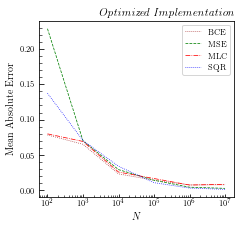

In [9]:
mae_plot([bce_avg, mse_avg, mlc_avg, sqr_avg],
         ['BCE', 'MSE', 'MLC', 'SQR'],
         Ns,
         figsize = (w, h),
         title = r'\it Optimized Implementation',
         filename = 'plots/paper/normal/best_sizes_3.png')

# Betas

## $C$ Parametrizations

### BCE $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce}
params_2 = {'loss':tanh_bce, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'output': 'linear'}

filestr = 'models/univariate/beta/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/beta/X_trn.npy')[:N]
y = np.load('data/beta/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.beta(2, 3)
sgnl = stats.beta(3, 2)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/beta/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (8, 8),
           title = r'\it $C$ Parametrization')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MSE $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse}
params_2 = {'loss':tanh_mse, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'output': 'linear'}

filestr = 'models/univariate/beta/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/beta/X_trn.npy')[:N]
y = np.load('data/beta/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.beta(2, 3)
sgnl = stats.beta(3, 2)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/beta/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mse_beta.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MLC $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'output': 'linear'}

filestr = 'models/univariate/beta/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/beta/X_trn.npy')[:N]
y = np.load('data/beta/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.beta(2, 3)
sgnl = stats.beta(3, 2)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/beta/')

#### Process

#### Likelihood Ratio

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mlc_beta.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### SQR $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'output': 'linear'}

filestr = 'models/univariate/beta/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/beta/X_trn.npy')[:N]
y = np.load('data/beta/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.beta(2, 3)
sgnl = stats.beta(3, 2)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/beta/')

#### Process

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

In [ ]:
ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_sqr_beta.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

## $A/B$ Parametrization

# Gammas

## $C$ Parametrizations

### BCE $C$ Parametrizations

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce}
params_2 = {'loss':tanh_bce, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'output': 'linear'}

filestr = 'models/univariate/gamma/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/gamma/X_trn.npy')[:N]
y = np.load('data/gamma/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.gamma(5, 1)
sgnl = stats.gamma(6, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/gamma/')

#### Process

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)
    
# Calculate predictions
xs = np.linspace(0, 20, 1201)
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_bce_gamma.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MSE $C$ Parametrizations

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse}
params_2 = {'loss':tanh_mse, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'output': 'linear'}

filestr = 'models/univariate/gamma/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/gamma/X_trn.npy')[:N]
y = np.load('data/gamma/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.gamma(5, 1)
sgnl = stats.gamma(6, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/gamma/')

#### Process

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)
    
# Calculate predictions
xs = np.linspace(0, 20, 1201)
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

ratio_plot([preds_1, preds_2, preds_3],
           [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mse_gamma.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### MLC $C$ Parametrizations

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'output': 'linear'}

filestr = 'models/univariate/gamma/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/gamma/X_trn.npy')[:N]
y = np.load('data/gamma/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.gamma(5, 1)
sgnl = stats.gamma(6, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/gamma/')

#### Process

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)
    
# Calculate predictions
xs = np.linspace(0, 20, 1201)
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_mlc_gamma.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

### SQR $C$ Parametrizations

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'output': 'linear'}

filestr = 'models/univariate/gamma/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/gamma/X_trn.npy')[:N]
y = np.load('data/gamma/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
bkgd = stats.gamma(5, 1)
sgnl = stats.gamma(6, 1)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/gamma/')

#### Process

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)
    
# Calculate predictions
xs = np.linspace(0, 20, 1201)
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

#### Likelihood Ratios

In [ ]:
xs = np.load(filestr + 'xs.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

ratio_plot([preds_1, preds_2, preds_3],
           [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$'],
           lr,
           bkgd, sgnl,
           xs,
           y_lim = (0, 10),
           figsize = (w, h),
           title = r'\it $C$ Parametrization',
           filename = 'plots/paper/c_sqr_gamma.png')

#### MAEs

In [ ]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

## $A/B$ Parametrization

# Multivariate Normal

## Naïve Implementation

### Case 0

### Case 1

### Case 2

### Case 3

### Case 4

## $C$ Parametrization

In [12]:
w = 3.5
h = 2.8

g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)
aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, 402), np.linspace(-2.005, 2.005, 402))

### Case 0

#### BCE $C$ Parametrization

In [13]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':2}
params_2 = {'loss':tanh_bce, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/vertical/X_trn.npy')[:N]
y = np.load('data/mvn/vertical/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([+0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/vertical/')

##### Process

##### Likelihood Ratios

In [14]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

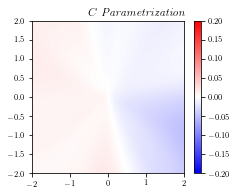

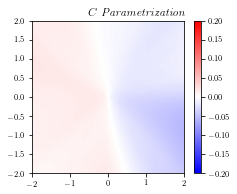

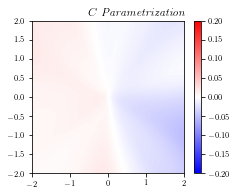

In [15]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_vertical_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_vertical_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_vertical_arctan.png')

##### MAEs

In [16]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.012728679264611716 0.01826200994442122 0.01397588390825478


#### MSE $C$ Parametrization

In [17]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':2}
params_2 = {'loss':tanh_mse, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/vertical/X_trn.npy')[:N]
y = np.load('data/mvn/vertical/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([+0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/vertical/')

##### Process

##### Likelihood Ratio

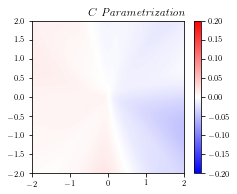

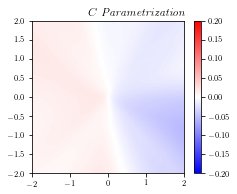

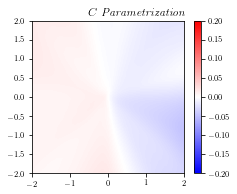

In [18]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_vertical_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_vertical_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_vertical_arctan.png')

##### MAEs

In [19]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.012593626387136278 0.017744671463479956 0.013865651991570464


#### MLC $C$ Parametrization

In [20]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/vertical/X_trn.npy')[:N]
y = np.load('data/mvn/vertical/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([+0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/vertical/')

##### Process

##### Likelihood Ratios

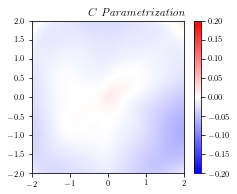

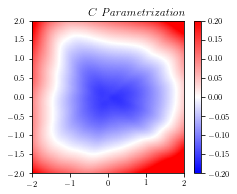

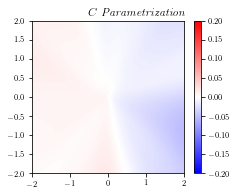

In [21]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_vertical_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_vertical_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_vertical_exponential.png')

##### MAEs

In [22]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.016557534906224067 0.14279898064555152 0.012754416093777204


#### SQR $C$ Parametrization

In [23]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/vertical/X_trn.npy')[:N]
y = np.load('data/mvn/vertical/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([+0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/vertical/')

##### Process

##### Likelihood Ratios

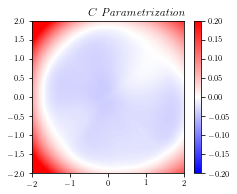

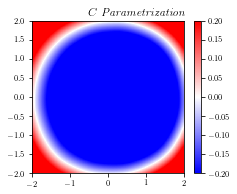

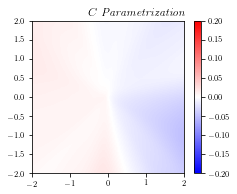

In [24]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_vertical_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_vertical_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_vertical_exponential.png')

##### MAEs

In [25]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.05198898136368592 0.7113595841266864 0.012801634137257212


### Case 1

#### BCE $C$ Parametrization

In [26]:
# Experiment parameters
num = 1
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':2}
params_2 = {'loss':tanh_bce, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/slant/X_trn.npy')[:N]
y = np.load('data/mvn/slant/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/slant/')

##### Process

##### Likelihood Ratios

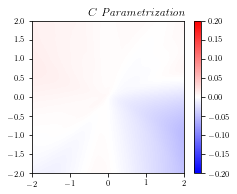

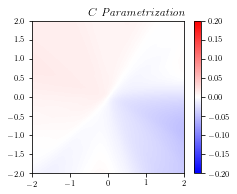

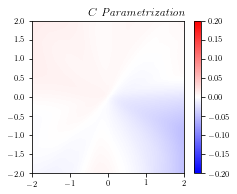

In [27]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_slant_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_slant_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_slant_arctan.png')

##### MAEs

In [28]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.12387564760977243 0.12329865904639632 0.12370854626447328


#### MSE $C$ Parametrization

In [29]:
# Experiment parameters
num = 1
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':2}
params_2 = {'loss':tanh_mse, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/slant/X_trn.npy')[:N]
y = np.load('data/mvn/slant/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/slant/')

##### Process

##### Likelihood Ratio

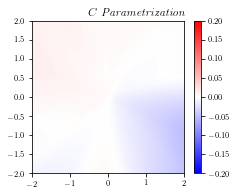

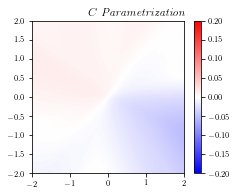

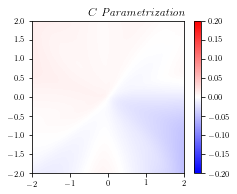

In [30]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_slant_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_slant_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_slant_arctan.png')

##### MAEs

In [31]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.12377026393728098 0.12296880861881988 0.12339298440292407


#### MLC $C$ Parametrization

In [32]:
# Experiment parameters
num = 1
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/slant/X_trn.npy')[:N]
y = np.load('data/mvn/slant/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/slant/')

##### Process

##### Likelihood Ratios

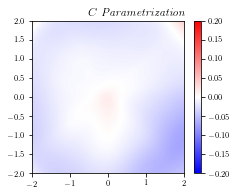

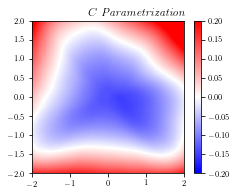

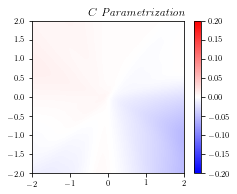

In [33]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_slant_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_slant_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_slant_exponential.png')

##### MAEs

In [34]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.12502092687068275 0.21408180136619162 0.12379316631689628


#### SQR $C$ Parametrization

In [35]:
# Experiment parameters
num = 1
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/slant/X_trn.npy')[:N]
y = np.load('data/mvn/slant/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/slant/')

##### Process

In [36]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)
    
# Calculate predictions
g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)
aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, 402), np.linspace(-2.005, 2.005, 402))

preds_1 = avg_lr(get_preds(lrs_1, xs = g))
preds_2 = avg_lr(get_preds(lrs_2, xs = g))
preds_3 = avg_lr(get_preds(lrs_3, xs = g))

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'g.npy', g)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

2022-08-09 18:17:10.486890: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-08-09 18:17:10.495598: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-08-09 18:17:10.497334: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562892f5ab90 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-09 18:17:10.497368: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-08-09 18:17:10.627842: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562892abd2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-08-09 18:17:10.627902: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-08-09 18:17:10.629147: I 

##### Likelihood Ratios

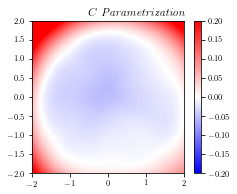

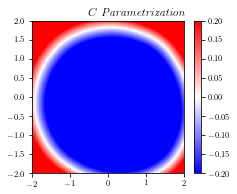

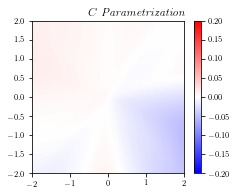

In [37]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_slant_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_slant_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_slant_exponential.png')

##### MAEs

In [38]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.057194784433545004 0.7912341442436691 0.011429683027282816


### Case 2

#### BCE $C$ Parametrization

In [39]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':2}
params_2 = {'loss':tanh_bce, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/circle/X_trn.npy')[:N]
y = np.load('data/mvn/circle/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/circle/')

##### Process

##### Likelihood Ratios

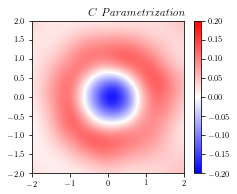

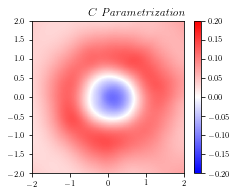

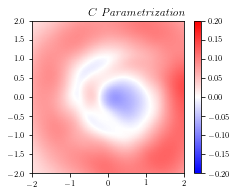

In [41]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_circle_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_circle_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_circle_arctan.png')

##### MAEs

In [42]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.06815905748949355 0.08242437113743177 0.05453451801525949


#### MSE $C$ Parametrization

In [43]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':2}
params_2 = {'loss':tanh_mse, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/circle/X_trn.npy')[:N]
y = np.load('data/mvn/circle/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/circle/')

##### Process

##### Likelihood Ratio

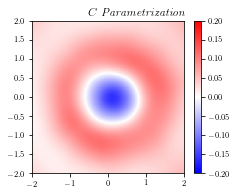

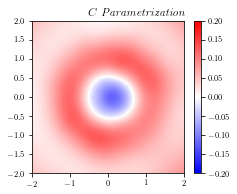

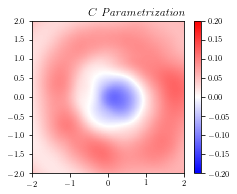

In [45]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_circle_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_circle_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_circle_arctan.png')

##### MAEs

In [46]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.06307058925340471 0.07399602951515391 0.06337892659379213


#### MLC $C$ Parametrization

In [47]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/circle/X_trn.npy')[:N]
y = np.load('data/mvn/circle/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/circle/')

##### Process

##### Likelihood Ratios

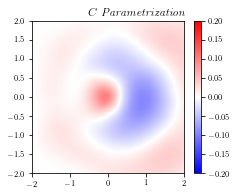

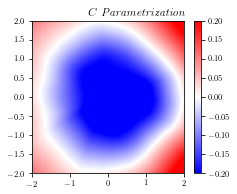

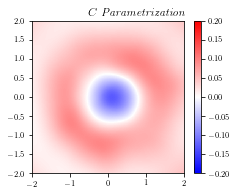

In [49]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_circle_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_circle_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_circle_exponential.png')

##### MAEs

In [50]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.03540741511365547 0.18553040437242074 0.05212963587749544


#### SQR $C$ Parametrization

In [51]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/circle/X_trn.npy')[:N]
y = np.load('data/mvn/circle/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/circle/')

##### Process

##### Likelihood Ratios

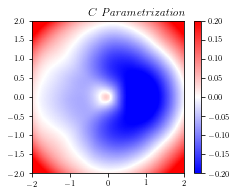

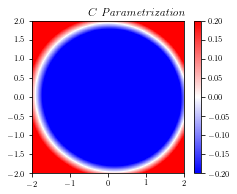

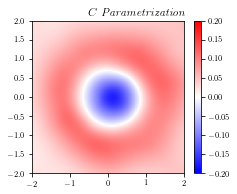

In [53]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_circle_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_circle_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_circle_exponential.png')

##### MAEs

In [54]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.16066701354609983 1.0067646723352965 0.06913254390206891


### Case 3

#### BCE $C$ Parametrization

In [55]:
# Experiment parameters
num = 3
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':2}
params_2 = {'loss':tanh_bce, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/hyperbola/X_trn.npy')[:N]
y = np.load('data/mvn/hyperbola/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/hyperbola/')

##### Process

##### Likelihood Ratios

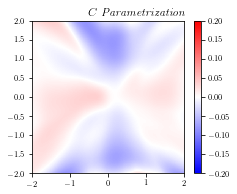

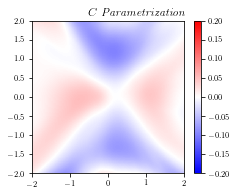

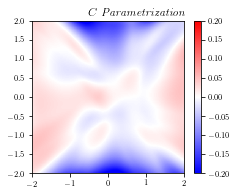

In [57]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_hyperbola_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_hyperbola_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_hyperbola_arctan.png')

##### MAEs

In [58]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.6502539899371161 0.6949089657130884 0.7438337532418392


#### MSE $C$ Parametrization

In [ ]:
# Experiment parameters
num = 3
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':2}
params_2 = {'loss':tanh_mse, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/hyperbola/X_trn.npy')[:N]
y = np.load('data/mvn/hyperbola/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/hyperbola/')

##### Process

##### Likelihood Ratio

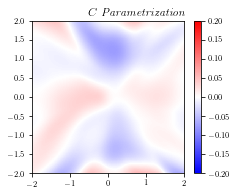

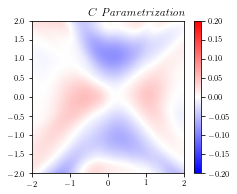

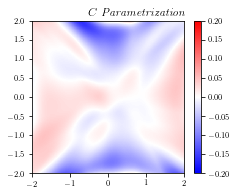

In [61]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_hyperbola_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_hyperbola_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_hyperbola_arctan.png')

##### MAEs

In [62]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.6967412082889385 0.7312852825250465 0.783586498852937


#### MLC $C$ Parametrization

In [63]:
# Experiment parameters
num = 3
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/hyperbola/X_trn.npy')[:N]
y = np.load('data/mvn/hyperbola/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/hyperbola/')

##### Process

##### Likelihood Ratios

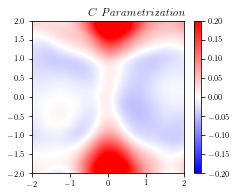

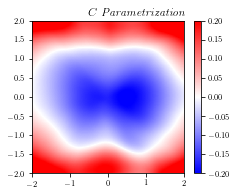

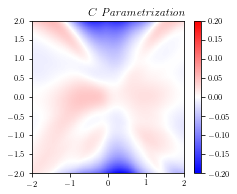

In [65]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_hyperbola_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_hyperbola_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_hyperbola_exponential.png')

##### MAEs

In [66]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.8786176707847129 0.9239168152135997 0.48233289691030296


#### SQR $C$ Parametrization

In [67]:
# Experiment parameters
num = 3
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/hyperbola/X_trn.npy')[:N]
y = np.load('data/mvn/hyperbola/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/hyperbola/')

##### Process

##### Likelihood Ratios

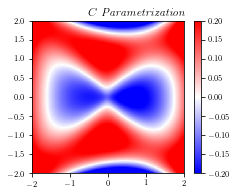

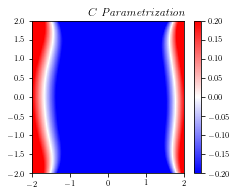

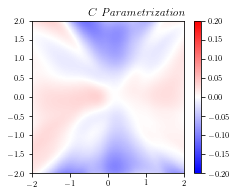

In [69]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_hyperbola_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_hyperbola_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_hyperbola_exponential.png')

##### MAEs

In [70]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

1.0948405711174027 1.6057778153713225 0.6159415036730826


### Case 4

#### BCE $C$ Parametrization

In [71]:
# Experiment parameters
num = 4
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':2}
params_2 = {'loss':tanh_bce, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/checker/X_trn.npy')[:N]
y = np.load('data/mvn/checker/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/checker/')

##### Process

##### Likelihood Ratios

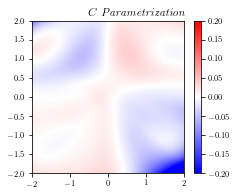

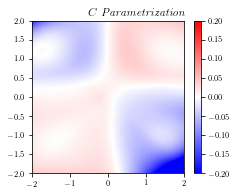

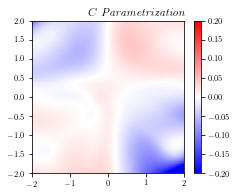

In [73]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_checker_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_checker_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_bce_checker_arctan.png')

##### MAEs

In [74]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.04146636235133548 0.051975444333920234 0.04748725643647277


#### MSE $C$ Parametrization

In [75]:
# Experiment parameters
num = 4
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':2}
params_2 = {'loss':tanh_mse, 'd':2, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/checker/X_trn.npy')[:N]
y = np.load('data/mvn/checker/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/checker/')

##### Process

##### Likelihood Ratio

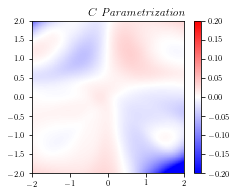

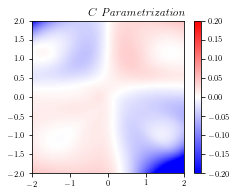

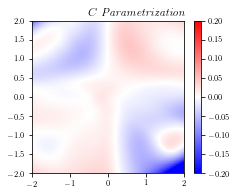

In [77]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_checker_sigmoid.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_checker_tanh.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mse_checker_arctan.png')

##### MAEs

In [78]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.04106929147402487 0.05167574534867649 0.04781989021994115


#### MLC $C$ Parametrization

In [79]:
# Experiment parameters
num = 4
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/checker/X_trn.npy')[:N]
y = np.load('data/mvn/checker/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/checker/')

##### Process

##### Likelihood Ratios

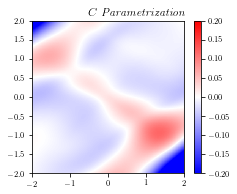

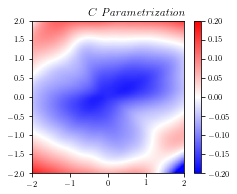

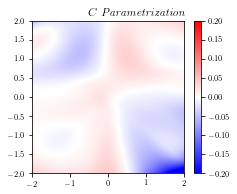

In [81]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_checker_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_checker_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_mlc_checker_exponential.png')

##### MAEs

In [82]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.06984770444819115 0.16863412548263376 0.038648007277838056


#### SQR $C$ Parametrization

In [83]:
# Experiment parameters
num = 4
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd':2, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd':2, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd':2,  'output': 'linear'}

filestr = 'models/multivariate/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/mvn/checker/X_trn.npy')[:N]
y = np.load('data/mvn/checker/y_trn.npy')[:N]
data, m, s = split_data(X, y)

# True distribution information
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl, 'data/mvn/checker/')

##### Process

##### Likelihood Ratios

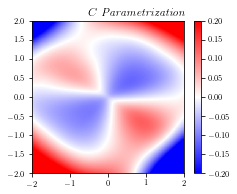

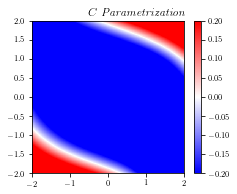

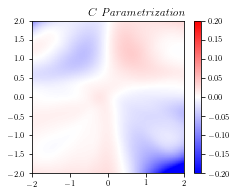

In [85]:
g = np.load(filestr + 'g.npy')
preds_1 = np.load(filestr + 'preds_1.npy')
preds_2 = np.load(filestr + 'preds_2.npy')
preds_3 = np.load(filestr + 'preds_3.npy')

diff_plot(preds_1,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_checker_relu.png')

diff_plot(preds_2,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_checker_square.png')

diff_plot(preds_3,
          lr,
          g,
          aa, bb, 
          figsize = (w, h),
          title = r'\it $C$ Parametrization',
          filename = 'plots/paper/c_sqr_checker_exponential.png')

##### MAEs

In [86]:
avg_1 = np.load(filestr + 'avg_1.npy')
avg_2 = np.load(filestr + 'avg_2.npy')
avg_3 = np.load(filestr + 'avg_3.npy')

print(avg_1, avg_2, avg_3)

0.13466537671385065 0.7013796122729414 0.04054289465942566


## $A/B$ Parametrization

### Case 0

### Case 1

### Case 2

### Case 3

### Case 4